# Chargement des données

In [1]:
import pandas as pd

avis_restaurants = pd.read_csv('D:/M2 SISE/Text Mining ou NLP/Projet/nlp_text_mining/Data/avis_restaurants_cleaned.csv') 

In [2]:
avis_restaurants

,restaurant,restaurant_address,title,user_profile,date_review,rating,type_visit,num_contributions,review,review_cleaned,year,month,day
0,Le Bouchon des Filles,"20 Rue Sergent-Blandan Parking Sathonay, 69001...",Très belle soirée,SetC77,2024-12-16,5.0,friends,67,"Trop bon moment!! \nAccueil, plats, ambiance t...",trop bon moment accueil plat ambiance tout pas...,2024,12,16
1,Le Bouchon des Filles,"20 Rue Sergent-Blandan Parking Sathonay, 69001...",Vive la bonne cuisine dans une ambiance conviv...,H3293ZGsylviel,2024-11-26,5.0,friends,2,"Toujours aussi goûteux !\nL'ambiance, la bonne...",toujours aussi goûteux lambiance bonne humeur ...,2024,11,26
2,Le Bouchon des Filles,"20 Rue Sergent-Blandan Parking Sathonay, 69001...",Sans plus,marieno_lleb739,2024-11-23,3.0,friends,96,Les serveurs et serveuses sont sympas. Mais l’...,serveurs serveuses sympas longlet nest tendre ...,2024,11,23
3,Le Bouchon des Filles,"20 Rue Sergent-Blandan Parking Sathonay, 69001...",Bon et joyeux,Vymsbmm,2024-11-14,5.0,friends,225,Une excellente soirée dans ce petit restaurant...,excellente soirée petit restaurant peu lécart ...,2024,11,14
4,Le Bouchon des Filles,"20 Rue Sergent-Blandan Parking Sathonay, 69001...",Bon restaurant et endroit pour se retrouver en...,Youliic974,2024-11-01,4.0,friends,38,Un super moment entre amis.\nLes plats étaient...,super moment entre amis plat très délicieux co...,2024,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,Le Grand Réfectoire,"3 Cour Saint Henri Grand Hôtel Dieu, 69002 Lyo...",Bel endroit avec une nourriture moyenne,lizziem808,2024-12-13,4.0,solo,1,"C'est un bel endroit avec un bon service, mais...",cest bel endroit bon service nourriture nétait...,2024,12,13
3026,Le Grand Réfectoire,"3 Cour Saint Henri Grand Hôtel Dieu, 69002 Lyo...",Doit améliorer le service,tlowry2021,2024-11-02,3.0,couples,5,cet endroit promettait beaucoup d'après les co...,cet endroit promettait beaucoup daprès comment...,2024,11,2
3027,Le Grand Réfectoire,"3 Cour Saint Henri Grand Hôtel Dieu, 69002 Lyo...",Endroit intéressant pour le dîner,777AMR,2024-10-20,4.0,friends,7,Endroit intéressant avec de la bonne nourritur...,endroit intéressant bonne nourriture service a...,2024,10,20
3028,Le Grand Réfectoire,"3 Cour Saint Henri Grand Hôtel Dieu, 69002 Lyo...",Pas la nourriture ou le service de qualité pou...,lisamareeh2016,2024-10-19,2.0,family,3,Mes filles et moi avons commandé le steak medi...,fille avon commandé steak medium demandé haric...,2024,10,19


# Analyse de Sentiment

In [3]:
avis_restaurants['sentiment_rating'] = avis_restaurants['rating'].apply(
    lambda x: 'Positif' if x > 3 else ('Négatif' if x < 3 else 'Neutre')
)

In [4]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convertir les ratings en 3 classes : Négatif (0), Positif (1), Neutre (2)
def sentiment_class(rating):
    if rating == 3:
        return 2  # Neutre
    elif rating >= 4:
        return 1  # Positif
    else:
        return 0  # Négatif

# Appliquer la fonction de conversion
avis_restaurants['sentiment'] = avis_restaurants['rating'].apply(sentiment_class)

# Tokenisation des avis
tokenizer = Tokenizer(num_words=10000)  # Limite de vocabulaire à 10,000 mots
tokenizer.fit_on_texts(avis_restaurants['review_cleaned'])
X = tokenizer.texts_to_sequences(avis_restaurants['review_cleaned'])

# Padding des séquences pour avoir des longueurs égales
X_pad = pad_sequences(X, padding='post', maxlen=200)  # Limite de 200 mots par avis

# Cibles (sentiment)
y = avis_restaurants['sentiment']

In [5]:
# Séparation en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Création du modèle LSTM pour 3 classes
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))  # Couche d'embedding
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # Couche LSTM
model.add(Dense(3, activation='softmax'))  # 3 classes, activation softmax pour la classification multi-classes

# Compilation du modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Évaluation du modèle
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # La classe avec la probabilité la plus élevée

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)  
print(f"Précision du modèle LSTM : {accuracy * 100:.2f}%")

e:\Application\Anaconda\envs\Nlp_projet\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 649ms/step - accuracy: 0.7194 - loss: 0.7792 - val_accuracy: 0.7789 - val_loss: 0.6791
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 591ms/step - accuracy: 0.7907 - loss: 0.6567 - val_accuracy: 0.7789 - val_loss: 0.6857
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 485ms/step - accuracy: 0.7698 - loss: 0.7005 - val_accuracy: 0.7789 - val_loss: 0.6851
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 598ms/step - accuracy: 0.7845 - loss: 0.6700 - val_accuracy: 0.7789 - val_loss: 0.6809
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 569ms/step - accuracy: 0.7869 - loss: 0.6610 - val_accuracy: 0.7789 - val_loss: 0.6798
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step
Précision du modèle LSTM : 77.89%


In [6]:
# mettre avis_restaurants[['rating', 'review_cleaned' ,'sentiment', 'sentiment_rating']].tail(40) dans un dataframe

# Sélectionner les 40 dernières lignes des colonnes spécifiées
df_tail = avis_restaurants[['rating', 'review_cleaned', 'sentiment', 'sentiment_rating']].tail(40)

# Afficher le dataframe résultant
df_tail


,rating,review_cleaned,sentiment,sentiment_rating
2990,3.0,immense restaurant privilège alors être autres...,2,Neutre
2991,5.0,très belle grande salle dun restaurant sus gar...,1,Positif
2992,4.0,très bel endroit mets raffinés personnel souri...,1,Positif
2993,5.0,jattendais impatience découvrir restaurant nai...,1,Positif
2994,4.0,bon accueil restauration hauteur lieu prestigi...,1,Positif
2995,4.0,endroit chargé dhistoire mets raffinés exotiqu...,1,Positif
2996,5.0,très bon restaurant plan accueil service surto...,1,Positif
2997,5.0,somme rendus entre amis déjeuner durant semain...,1,Positif
2998,5.0,recommande vivement lieu chic bâtiments rénové...,1,Positif
2999,4.0,tout dabord plat délicieux cest quand lessenti...,1,Positif


# Identification des thèmes avec Word Embeddings

Utiliser un modèle pré-entraîné

In [7]:
from gensim.models import Word2Vec

# Tokenisation des avis
tokens = [avis.split() for avis in avis_restaurants['review_cleaned']]

# Entraîner un modèle Word2Vec
model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=2, workers=4)

# Exemple : mots similaires à "service"
print(model.wv.most_similar('service'))


[('sympathique', 0.9984447360038757), ('professionnel', 0.9980849027633667), ('personnel', 0.9979743361473083), ('chaleureux', 0.9979729652404785), ('efficace', 0.9976592063903809), ('sympa', 0.997647762298584), ('bonne', 0.9976286888122559), ('impeccable', 0.9976120591163635), ('rapide', 0.9971942901611328), ('accueil', 0.9971635341644287)]


Clusterisation pour regrouper les thèmes

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Extraire les vecteurs de mots
word_vectors = np.array([model.wv[word] for word in model.wv.index_to_key])

# Clusterisation en 5 thèmes
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(word_vectors)

# Associer chaque mot à un cluster
word_clusters = {word: kmeans.labels_[i] for i, word in enumerate(model.wv.index_to_key)}

# Afficher les mots par cluster
for cluster in range(5):
    print(f"Thème {cluster + 1}:")
    print([word for word, label in word_clusters.items() if label == cluster])
    print("\n")


Thème 1:
['fortement', 'déjeuné', 'cuisinés', 'dexception', 'convivialité', 'charme', 'réputation', 'lent', 'pourrait', 'copieuses', 'savoureuse', 'allé', 'sympas', 'testé', 'change', 'copieuse', 'accueillis', 'hésiter', 'inoubliable', 'abordable', 'servies', 'typiquement', 'occasion', 'appréciable', 'arrivé', 'standing', 'souriantes', 'laise', 'typiques', 'hier', 'délicieuses', 'incontournable', 'reviendra', 'travaillés', 'courte', 'ravis', 'hésitation', 'ouvert', 'soigné', 'proches', 'efficaces', 'voulu', 'souffle', 'apprécier', 'présenté', 'cosy', 'doriginalité', 'passant', 'gentil', 'humeur', 'normal', 'uniquement', 'met', 'salée', 'globalement', 'moderne', 'faisait', 'goûter', 'soignée', 'décevante', 'journée', 'dentrée', 'parmi', 'somptueux', 'principaux', 'piscine', 'intérêt', 'atypique', 'ami', 'chic', 'lhotel', 'romantique', 'gustatif', 'voilà', 'couper', 'merveille', 'aime', 'grandiose', 'etait', 'rare', 'responsable', 'grosse', 'ème', 'raisonnables', 'limité', 'pleine', 'dét

# Recommandations

Identifie les points positifs et négatifs des avis pour générer des recommandations :

Regroupe les mots les plus fréquents dans les avis positifs/négatifs.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


# Charger les mots d'arrêt en français
french_stopwords = stopwords.words('french')

# Vectorisation des avis en excluant les mots d'arrêt en français
vectorizer = CountVectorizer(stop_words=french_stopwords)
X = vectorizer.fit_transform(avis_restaurants['review_cleaned'])


# Extraire les mots les plus fréquents dans les avis positifs et négatifs
positive_reviews = avis_restaurants[avis_restaurants['sentiment'] == 1]['review_cleaned']
negative_reviews = avis_restaurants[avis_restaurants['sentiment'] == 0]['review_cleaned']
neutre_reviews = avis_restaurants[avis_restaurants['sentiment'] == 2]['review_cleaned']

positive_matrix = vectorizer.transform(positive_reviews)
negative_matrix = vectorizer.transform(negative_reviews)
neutre_matrix = vectorizer.transform(neutre_reviews)

positive_freq = np.asarray(positive_matrix.sum(axis=0)).flatten()
negative_freq = np.asarray(negative_matrix.sum(axis=0)).flatten()
neutre_freq = np.asarray(neutre_matrix.sum(axis=0)).flatten()


# Mots fréquents dans les avis positifs
positive_words = [word for word, freq in zip(vectorizer.get_feature_names_out(), positive_freq) if freq > 10]
# Mots fréquents dans les avis négatifs
negative_words = [word for word, freq in zip(vectorizer.get_feature_names_out(), negative_freq) if freq > 10]
# Mots fréquents dans les avis neutre
neutre_words = [word for word, freq in zip(vectorizer.get_feature_names_out(), neutre_freq) if freq > 10]

print("Points Positifs :", positive_words)
print("Points Négatifs :", negative_words)
print("Points neutre :", neutre_words)


Points Positifs : ['abordable', 'abordables', 'absolument', 'acceuil', 'accompagner', 'accompagné', 'accompagnés', 'accord', 'accueil', 'accueillant', 'accueillante', 'accueilli', 'accueillis', 'addition', 'adorable', 'adoré', 'adresse', 'agreable', 'agréable', 'agréablement', 'agréables', 'aimable', 'aime', 'aimé', 'ainsi', 'aller', 'allez', 'allé', 'allés', 'alors', 'amateur', 'ambiance', 'ami', 'amis', 'amoureux', 'amuse', 'ancien', 'andouillette', 'anniversaire', 'appréciable', 'apprécier', 'apprécié', 'après', 'apéritif', 'arrive', 'arrivée', 'arrivés', 'assez', 'assiette', 'assiettes', 'association', 'atmosphère', 'attendre', 'attentes', 'attentif', 'attention', 'attentionné', 'atypique', 'aucun', 'aucune', 'aussi', 'autant', 'authentique', 'autour', 'autre', 'autres', 'avant', 'avis', 'avoir', 'avon', 'bar', 'base', 'beau', 'beaucoup', 'beaujolais', 'bel', 'belle', 'beurre', 'bien', 'bientôt', 'bistronomique', 'bistrot', 'blanc', 'boeuf', 'boissons', 'bon', 'bonheur', 'bonne', '

# Évolution du Sentiment dans le Temps

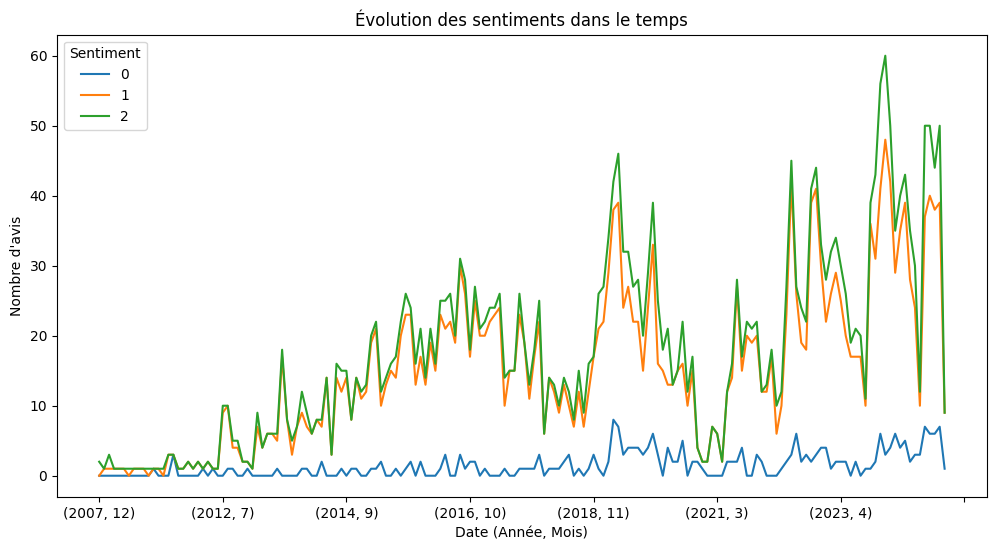

In [10]:
import matplotlib.pyplot as plt

# Calculer la répartition des sentiments par mois
sentiments_par_mois = avis_restaurants.groupby(['year', 'month', 'sentiment']).size().unstack().fillna(0)

# Visualiser l'évolution
sentiments_par_mois.plot(kind='line', stacked=True, figsize=(12, 6))
plt.title("Évolution des sentiments dans le temps")
plt.xlabel("Date (Année, Mois)")
plt.ylabel("Nombre d'avis")
plt.legend(title="Sentiment")
plt.show()

# Résumé Automatique des Avis

Pour un restaurant

In [12]:
from transformers import pipeline

# Chargement du pipeline de résumé
summarizer = pipeline("summarization", model="t5-small", tokenizer="t5-small")

# Fonction pour segmenter les avis en morceaux de taille raisonnable
def segmenter_avis(texte, taille_segment=100):
    mots = texte.split()
    for i in range(0, len(mots), taille_segment):
        yield ' '.join(mots[i:i + taille_segment])

# Fonction pour résumer automatiquement les avis
def resumer_avis_restaurant(avis, taille_segment=100, max_length=15, min_length=5):
    segments = list(segmenter_avis(avis, taille_segment))
    resumes = []
    
    for segment in segments:
        try:
            resume = summarizer(segment, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']
            resumes.append(resume)
        except Exception as e:
            resumes.append(f"Erreur lors du résumé : {str(e)}")
    
    # Combinaison des résumés partiels en un résumé global, limité à 15 mots maximum
    resume_global = ' '.join(resumes)
    return ' '.join(resume_global.split()[:15])  # Limite à 15 mots

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Device set to use 0


In [13]:
# Exemple : Avis pour un seul restaurant
nom_restaurant = "Le Bouchon des Filles"
avis_selec = avis_restaurants[avis_restaurants['restaurant'] == nom_restaurant]['review_cleaned'].str.cat(sep=' ')

# Génération du résumé
resume_restaurant = resumer_avis_restaurant(avis_selec)

# Affichage du résultat limité à 15 mots
print(f"Résumé des avis pour {nom_restaurant} :\n{resume_restaurant}")

Résumé des avis pour Le Bouchon des Filles :
trop bon moment accueil plat ambiance tout passer bon moment entre amis jai cherché pommes


Pour plusieurs restaurants

In [17]:
from transformers import pipeline
import pandas as pd

# Chargement du pipeline de résumé
summarizer = pipeline("summarization", model="t5-small", tokenizer="t5-small")

# Fonction pour segmenter les avis en morceaux de taille raisonnable
def segmenter_avis(texte, taille_segment=100):
    mots = texte.split()
    for i in range(0, len(mots), taille_segment):
        yield ' '.join(mots[i:i + taille_segment])

# Fonction pour résumer les avis d'un restaurant donné
def resumer_avis(avis, taille_segment=100, max_length=10, min_length=5):
    segments = list(segmenter_avis(avis, taille_segment))
    resumes = []
    
    for segment in segments:
        try:
            resume = summarizer(segment, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']
            resumes.append(resume)
        except Exception as e:
            resumes.append(f"Erreur lors du résumé : {str(e)}")
    
    # Combinaison des résumés partiels en un résumé global
    resume_global = ' '.join(resumes)
    return ' '.join(resume_global.split()[:10])  # Limite à 15 mots

# Fonction pour générer les résumés pour chaque restaurant à partir de plusieurs avis
def resumer_avis_par_restaurant(dataframe, taille_segment=100):
    resultats = []
    
    for restaurant, avis_groupes in dataframe.groupby("restaurant"):
        # Concaténer tous les avis du restaurant en une seule chaîne de texte
        texte_avis = ' '.join(avis_groupes['review'].tolist())
        resume_avis = resumer_avis(texte_avis, taille_segment)
        resultats.append({"restaurant": restaurant, "resume_avis": resume_avis})
    
    return pd.DataFrame(resultats)


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Device set to use 0


In [ ]:
# Génération des résumés
resume_df = resumer_avis_par_restaurant(avis_restaurants)

# Affichage des résultats
print(resume_df)

# Comparer les sentiments ou thèmes avec les notes attribuées

Ajouter une analyse descriptive des notes par sentiment

sentiment_rating
Neutre     3.000000
Négatif    1.690377
Positif    4.757828
Name: rating, dtype: float64


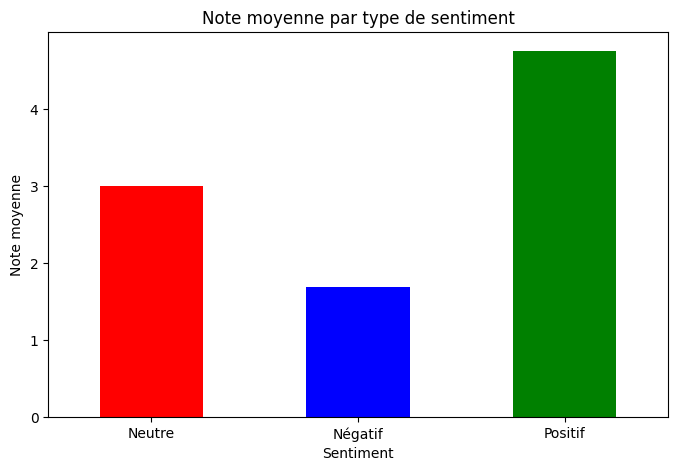

In [19]:
# Calculer la note moyenne par sentiment
sentiment_note_moyenne = avis_restaurants.groupby('sentiment_rating')['rating'].mean()
print(sentiment_note_moyenne)

# Visualiser avec un graphique
import matplotlib.pyplot as plt

sentiment_note_moyenne.plot(kind='bar', color=['red', 'blue', 'green'], figsize=(8, 5))
plt.title("Note moyenne par type de sentiment")
plt.ylabel("Note moyenne")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.show()


Analyse des thèmes les plus fréquents par note

In [20]:
from collections import Counter

# Fonction pour obtenir les mots fréquents selon la note
def mots_frequents_par_note(data, note_min, note_max):
    avis = data[(data['rating'] >= note_min) & (data['rating'] <= note_max)]['review_cleaned']
    tous_mots = ' '.join(avis).split()
    return Counter(tous_mots).most_common(10)

# Exemples pour différentes plages de notes
mots_notes_basses = mots_frequents_par_note(avis_restaurants, 1, 2)
mots_notes_moyennes = mots_frequents_par_note(avis_restaurants, 3, 3)
mots_notes_hautes = mots_frequents_par_note(avis_restaurants, 4, 5)

print("Mots fréquents (notes basses) :", mots_notes_basses)
print("Mots fréquents (notes moyennes) :", mots_notes_moyennes)
print("Mots fréquents (notes hautes) :", mots_notes_hautes)

Mots fréquents (notes basses) : [('très', 186), ('plat', 179), ('service', 159), ('restaurant', 133), ('plus', 123), ('bien', 103), ('sans', 103), ('tout', 97), ('table', 93), ('avon', 85)]
Mots fréquents (notes moyennes) : [('très', 347), ('plat', 289), ('service', 257), ('plus', 190), ('peu', 176), ('avon', 161), ('sans', 147), ('bon', 144), ('bien', 138), ('restaurant', 135)]
Mots fréquents (notes hautes) : [('très', 3137), ('plat', 1645), ('service', 1533), ('bon', 1137), ('restaurant', 1059), ('bien', 1040), ('cuisine', 1010), ('avon', 993), ('tout', 903), ('qualité', 849)]


# Analyse intra-restaurant : Comparaison avant/après une date

Diviser les données en deux périodes

In [21]:
# Assurez-vous que la colonne 'date_review' est bien de type datetime
avis_restaurants['date_review'] = pd.to_datetime(avis_restaurants['date_review'], errors='coerce')


In [22]:
# Définir une date de seuil
date_seuil = '2024-01-01'

# Créer une colonne pour indiquer si l'avis est avant ou après la date
avis_restaurants['periode'] = avis_restaurants['date_review'].apply(
    lambda x: 'Avant' if x < pd.to_datetime(date_seuil) else 'Après'
)

# Vérifier la distribution des avis par période
print(avis_restaurants['periode'].value_counts())


periode
Avant    3428
Après     697
Name: count, dtype: int64


Analyser les sentiments par période

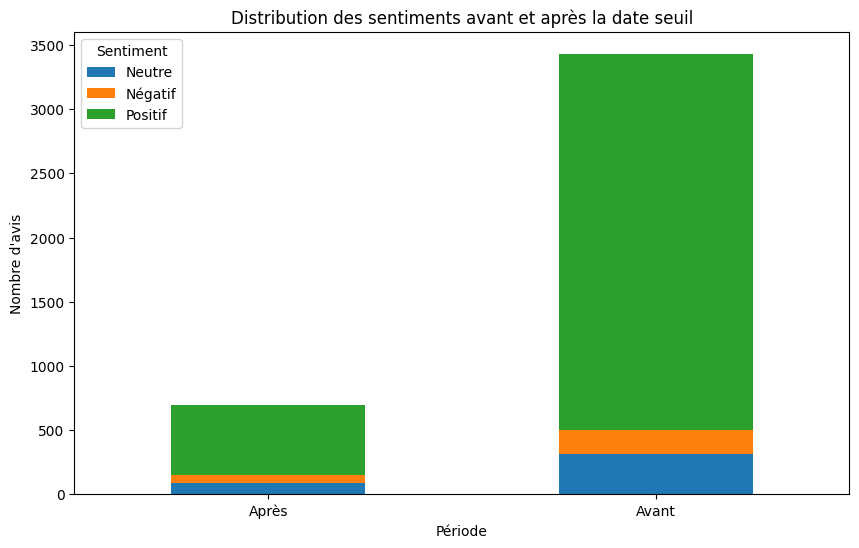

In [23]:
# Distribution des sentiments par période
sentiments_par_periode = avis_restaurants.groupby(['periode', 'sentiment_rating']).size().unstack().fillna(0)

# Visualiser avec un graphique
sentiments_par_periode.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution des sentiments avant et après la date seuil")
plt.xlabel("Période")
plt.ylabel("Nombre d'avis")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.show()


Comparer les notes avant et après la date

periode
Après    4.274032
Avant    4.434656
Name: rating, dtype: float64


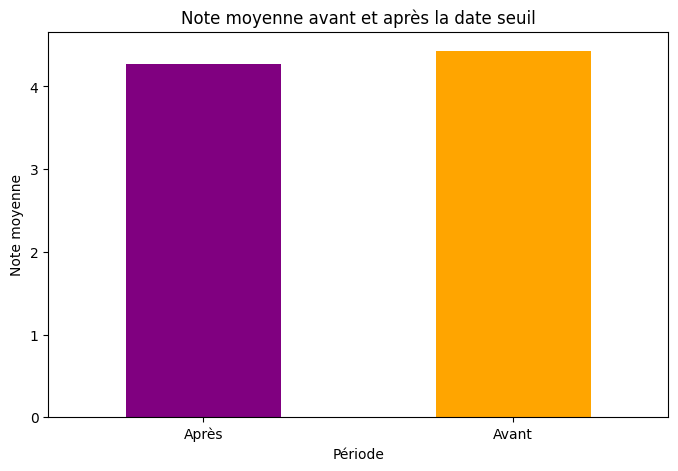

In [24]:
# Note moyenne par période
note_moyenne_par_periode = avis_restaurants.groupby('periode')['rating'].mean()
print(note_moyenne_par_periode)

# Visualiser
note_moyenne_par_periode.plot(kind='bar', color=['purple', 'orange'], figsize=(8, 5))
plt.title("Note moyenne avant et après la date seuil")
plt.ylabel("Note moyenne")
plt.xlabel("Période")
plt.xticks(rotation=0)
plt.show()

# Nuages de mots interactifs.

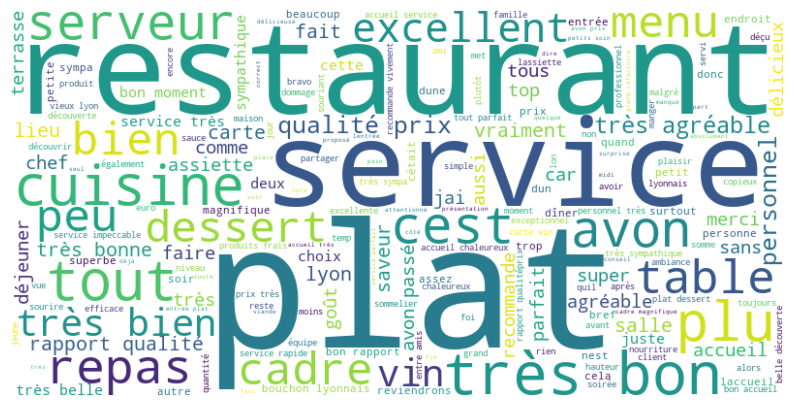

In [26]:
#Nuage de mots
from wordcloud import WordCloud 

# Concaténer tous les avis
tous_avis = ' '.join(avis_restaurants['review_cleaned'])

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(tous_avis)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


